In [1]:
import numpy as np
import pandas as pd
import os

# LOAD IN THE DATA

In [2]:
train = pd.read_csv(r"C:\Users\DELL\Downloads\intercampusai2019\UI_train.csv")
test = pd.read_csv(r"C:\Users\DELL\Downloads\intercampusai2019\UI_test.csv")
submission = pd.read_csv(r"C:\Users\DELL\Downloads\intercampusai2019\UI_sample_submission2.csv")

# Take a quick look at the data




In [3]:
train.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0,0
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,0,42,NIGER,Yes,Single,No,No,1,0
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.5,2012,0,0,77,AKWA IBOM,Yes,Married,No,No,1,0


In [4]:
test.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers
0,YAK/S/00005,Information Technology and Solution Support,First Degree or HND,Male,Agency and others,2,1976,7.5,2017,0,0,65,FCT,Yes,Married,No,No,1
1,YAK/S/00011,Information Technology and Solution Support,NaN,Male,Direct Internal process,2,1991,0.0,2018,0,0,69,OGUN,Yes,Married,No,No,1
2,YAK/S/00015,Research and Innovation,"MSc, MBA and PhD",Male,Direct Internal process,2,1984,7.5,2012,0,0,76,KANO,Yes,Married,No,No,1
3,YAK/S/00016,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1984,2.5,2009,0,0,52,RIVERS,No,Single,No,No,1
4,YAK/S/00017,Information Technology and Solution Support,First Degree or HND,Male,Agency and others,2,1983,7.5,2014,1,0,69,FCT,Yes,Married,No,No,0


# Checking out the statistics of the data


In [5]:
train.describe()

,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,Promoted_or_Not
count,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000
mean,2.253680,1986.209334,7.698959,2013.139695,0.352996,0.023152,55.366465,0.084595
std,0.609443,7.646047,3.744135,4.261451,0.477908,0.150388,13.362741,0.278282
min,2.000000,1950.000000,0.000000,1982.000000,0.000000,0.000000,31.000000,0.000000
25%,2.000000,1982.000000,5.000000,2012.000000,0.000000,0.000000,43.000000,0.000000
50%,2.000000,1988.000000,7.500000,2014.000000,0.000000,0.000000,52.000000,0.000000
75%,2.000000,1992.000000,10.000000,2016.000000,1.000000,0.000000,68.000000,0.000000
max,11.000000,2001.000000,12.500000,2018.000000,1.000000,1.000000,91.000000,1.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 19 columns):
EmployeeNo                             38312 non-null object
Division                               38312 non-null object
Qualification                          36633 non-null object
Gender                                 38312 non-null object
Channel_of_Recruitment                 38312 non-null object
Trainings_Attended                     38312 non-null int64
Year_of_birth                          38312 non-null int64
Last_performance_score                 38312 non-null float64
Year_of_recruitment                    38312 non-null int64
Targets_met                            38312 non-null int64
Previous_Award                         38312 non-null int64
Training_score_average                 38312 non-null int64
State_Of_Origin                        38312 non-null object
Foreign_schooled                       38312 non-null object
Marital_Status                         383

In [7]:
train.shape

(38312, 19)

In [8]:
test.shape

(16496, 18)

# Check For Missing Values

In [9]:
train.isnull().sum()

EmployeeNo                                0
Division                                  0
Qualification                          1679
Gender                                    0
Channel_of_Recruitment                    0
Trainings_Attended                        0
Year_of_birth                             0
Last_performance_score                    0
Year_of_recruitment                       0
Targets_met                               0
Previous_Award                            0
Training_score_average                    0
State_Of_Origin                           0
Foreign_schooled                          0
Marital_Status                            0
Past_Disciplinary_Action                  0
Previous_IntraDepartmental_Movement       0
No_of_previous_employers                  0
Promoted_or_Not                           0
dtype: int64

In [10]:
test.isnull().sum()

EmployeeNo                               0
Division                                 0
Qualification                          730
Gender                                   0
Channel_of_Recruitment                   0
Trainings_Attended                       0
Year_of_birth                            0
Last_performance_score                   0
Year_of_recruitment                      0
Targets_met                              0
Previous_Award                           0
Training_score_average                   0
State_Of_Origin                          0
Foreign_schooled                         0
Marital_Status                           0
Past_Disciplinary_Action                 0
Previous_IntraDepartmental_Movement      0
No_of_previous_employers                 0
dtype: int64

In [11]:
train.Qualification.unique()

array(['MSc, MBA and PhD', 'First Degree or HND', nan,
       'Non-University Education'], dtype=object)

# Bivariate Analysis 

### This is to check the relationship between the categoical variable and the target variable, we would be checking how well the different categories define/affect the target


In [12]:
#trying to visualize pat of the data...
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<function matplotlib.pyplot.show(*args, **kw)>

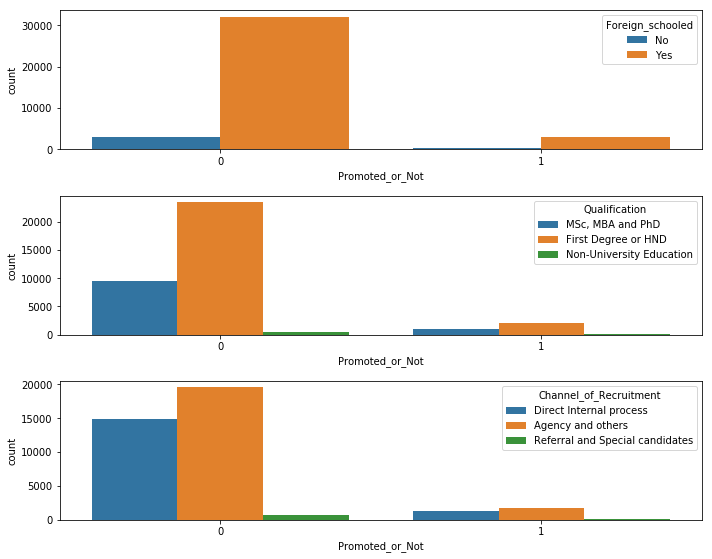

In [13]:
plt.figure(figsize = (10,10))
plt.subplot(4,1,1)
sns.countplot(train[ 'Promoted_or_Not'], hue = 'Foreign_schooled', data = train)
plt.xlabel('Promoted_or_Not')
plt.tight_layout()
plt.show


plt.subplot(4,1,2)
sns.countplot(train['Promoted_or_Not'], hue = 'Qualification', data = train)
plt.xlabel('Promoted_or_Not')
plt.tight_layout()
plt.show

plt.subplot(4,1,3)
sns.countplot(train['Promoted_or_Not'], hue = 'Channel_of_Recruitment', data = train)
plt.xlabel('Promoted_or_Not')
plt.tight_layout()
plt.show





<function matplotlib.pyplot.show(*args, **kw)>

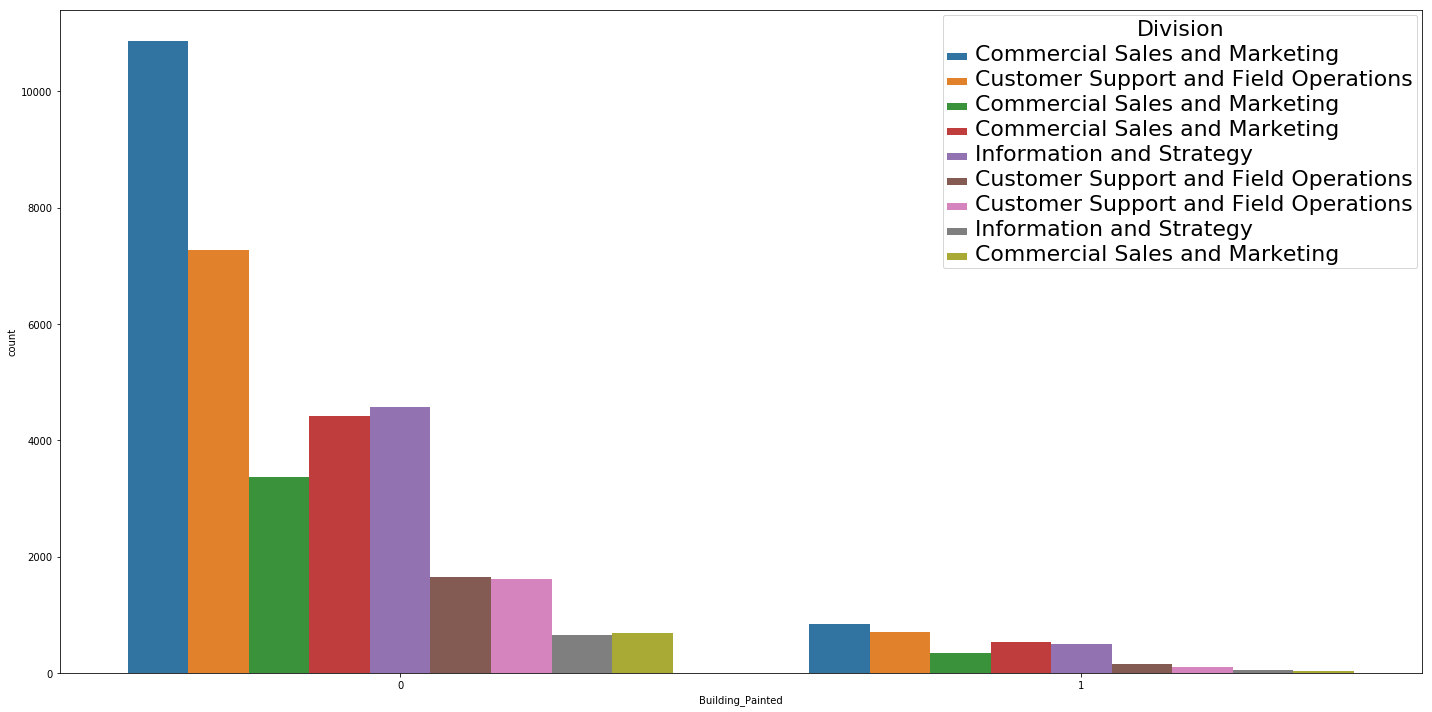

In [14]:
plt.figure(figsize = (20,10))
ax= sns.countplot(x= train['Promoted_or_Not'], hue = train['Division'], data = train)
plt.xlabel('Building_Painted')
plt.tight_layout()
plt.legend(title= 'Division', loc='best', labels =train['Division'])
plt.setp(ax.get_legend().get_texts(),fontsize ='22')
plt.setp(ax.get_legend().get_title(),fontsize ='22')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

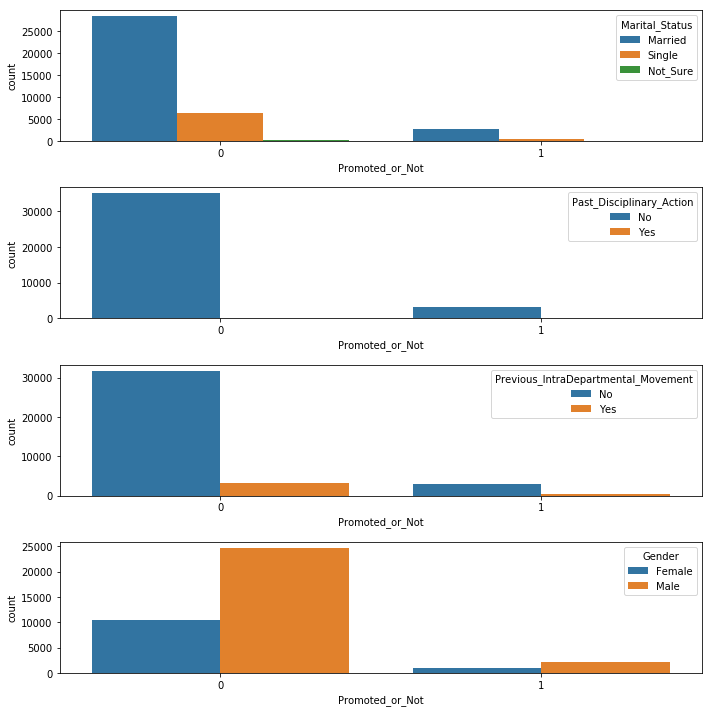

In [15]:
plt.figure(figsize = (10,10))
plt.subplot(4,1,1)
sns.countplot(train['Promoted_or_Not'], hue = 'Marital_Status', data = train)
plt.xlabel('Promoted_or_Not')
plt.tight_layout()
plt.show

plt.subplot(4,1,2)
sns.countplot(train['Promoted_or_Not'], hue = 'Past_Disciplinary_Action', data = train)
plt.xlabel('Promoted_or_Not')
plt.tight_layout()
plt.show

plt.subplot(4,1,3)
sns.countplot(train['Promoted_or_Not'], hue ='Previous_IntraDepartmental_Movement' ,data = train)
plt.xlabel('Promoted_or_Not')
plt.tight_layout()
plt.show

plt.subplot(4,1,4)
sns.countplot(train['Promoted_or_Not'], hue = 'Gender', data = train)
plt.xlabel('Promoted_or_Not')
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

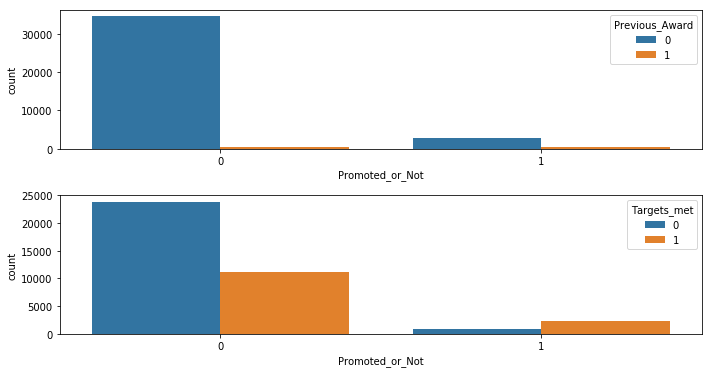

In [16]:
plt.figure(figsize = (10,10))
plt.subplot(4,1,1)
sns.countplot(train['Promoted_or_Not'], hue = 'Previous_Award', data = train)
plt.xlabel('Promoted_or_Not')
plt.tight_layout()
plt.show

plt.subplot(4,1,2)
sns.countplot(train['Promoted_or_Not'], hue = 'Targets_met', data = train)
plt.xlabel('Promoted_or_Not')
plt.tight_layout()
plt.show



# Then we try and do a Univariate Analysis to check for skewness of some numerical variables

In [17]:
train['age'] =2020 -train['Year_of_birth']
test['age'] =2020 -test['Year_of_birth']

train["Years_Of_Service"]= 2020 - train['Year_of_recruitment']
test["Years_Of_Service"]= 2020 - test['Year_of_recruitment']

C:\Users\DELL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<function matplotlib.pyplot.show(*args, **kw)>

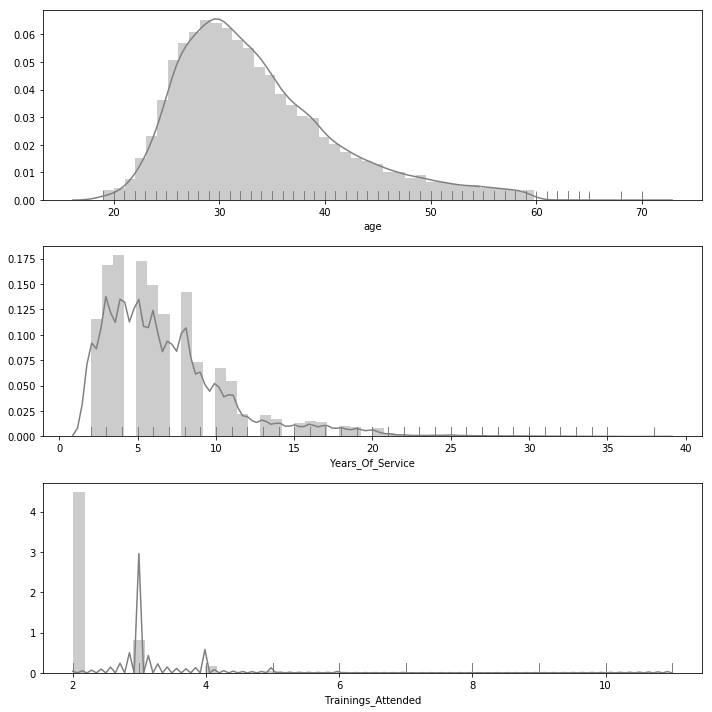

In [18]:
plt.figure(figsize = (10,10))
plt.subplot(3,1,1)
sns.distplot(train['age'], kde=True, rug=True, color ='grey')
plt.xlabel('age')
plt.tight_layout()
plt.show

plt.subplot(3,1,2)
sns.distplot(train['Years_Of_Service'], kde=True, rug=True, color ='grey')
plt.xlabel('Years_Of_Service')
plt.tight_layout()
plt.show


plt.subplot(3,1,3)
sns.distplot(train['Trainings_Attended'], kde=True, rug=True, color ='grey')
plt.xlabel('Trainings_Attended')
plt.tight_layout()
plt.show



In [19]:
train.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,...,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not,age,Years_Of_Service
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,...,41,ANAMBRA,No,Married,No,No,0,0,34,9
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,...,52,ANAMBRA,Yes,Married,No,No,0,0,29,5
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,...,42,KATSINA,Yes,Married,No,No,0,0,33,8
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,...,42,NIGER,Yes,Single,No,No,1,0,38,11
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.5,2012,0,...,77,AKWA IBOM,Yes,Married,No,No,1,0,30,8


### We drop the Year of Recuitment and Year of Birth

In [20]:
train.drop(['Year_of_recruitment'], axis =1 , inplace = True)
train.drop(['Year_of_birth'], axis =1, inplace = True)

test.drop(['Year_of_recruitment'], axis =1 , inplace = True)
test.drop(['Year_of_birth'], axis =1, inplace = True)

In [21]:
train.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Last_performance_score,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not,age,Years_Of_Service
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,12.5,1,0,41,ANAMBRA,No,Married,No,No,0,0,34,9
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,12.5,0,0,52,ANAMBRA,Yes,Married,No,No,0,0,29,5
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,7.5,0,0,42,KATSINA,Yes,Married,No,No,0,0,33,8
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,2.5,0,0,42,NIGER,Yes,Single,No,No,1,0,38,11
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,7.5,0,0,77,AKWA IBOM,Yes,Married,No,No,1,0,30,8


In [22]:
test.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Last_performance_score,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,age,Years_Of_Service
0,YAK/S/00005,Information Technology and Solution Support,First Degree or HND,Male,Agency and others,2,7.5,0,0,65,FCT,Yes,Married,No,No,1,44,3
1,YAK/S/00011,Information Technology and Solution Support,NaN,Male,Direct Internal process,2,0.0,0,0,69,OGUN,Yes,Married,No,No,1,29,2
2,YAK/S/00015,Research and Innovation,"MSc, MBA and PhD",Male,Direct Internal process,2,7.5,0,0,76,KANO,Yes,Married,No,No,1,36,8
3,YAK/S/00016,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,2.5,0,0,52,RIVERS,No,Single,No,No,1,36,11
4,YAK/S/00017,Information Technology and Solution Support,First Degree or HND,Male,Agency and others,2,7.5,1,0,69,FCT,Yes,Married,No,No,0,37,6


# We fill in the missing values in Qualification with forward fill

In [23]:
train.Qualification.unique()

array(['MSc, MBA and PhD', 'First Degree or HND', nan,
       'Non-University Education'], dtype=object)

In [24]:
 train['Qualification'] = train['Qualification'].fillna(method = 'ffill')

In [25]:
test.Qualification.unique()

array(['First Degree or HND', nan, 'MSc, MBA and PhD',
       'Non-University Education'], dtype=object)

In [26]:
test['Qualification'] = test['Qualification'].fillna(method = 'ffill')

# Transform some variables by eplacing them with Number
### Manually encoding this is good so you can state by youself which should have the highest and lowest rank

In [27]:
train['Qualification'] = train['Qualification'].replace({'Non-University Education':0, 'MSc, MBA and PhD':2, 'First Degree or HND':1})
test['Qualification'] = test['Qualification'].replace({'Non-University Education':0, 'MSc, MBA and PhD':2, 'First Degree or HND':1})

train['Foreign_schooled']=train['Foreign_schooled'].replace({'No': 0, 'Yes': 1})
test['Foreign_schooled']=test['Foreign_schooled'].replace({'No': 0, 'Yes': 1})

train['Past_Disciplinary_Action']=train['Past_Disciplinary_Action'].replace({'No': 0, 'Yes': 1})
test['Past_Disciplinary_Action']=test['Past_Disciplinary_Action'].replace({'No': 0, 'Yes': 1})


train['Previous_IntraDepartmental_Movement']=train['Previous_IntraDepartmental_Movement'].replace({'No': 0, 'Yes': 1})
test['Previous_IntraDepartmental_Movement']=test['Previous_IntraDepartmental_Movement'].replace({'No': 0, 'Yes': 1})

train['Gender']=train['Gender'].replace({'Female': 0, 'Male': 1})
test['Gender']=test['Gender'].replace({'Female': 0, 'Male': 1})

train['Marital_Status']=train['Marital_Status'].replace({'Single': 0, 'Married': 1})
test['Marital_Status']=test['Marital_Status'].replace({'Single': 0, 'Married': 1})


In [28]:
train.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Last_performance_score,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not,age,Years_Of_Service
0,YAK/S/00001,Commercial Sales and Marketing,2,0,Direct Internal process,2,12.5,1,0,41,ANAMBRA,0,1,0,0,0,0,34,9
1,YAK/S/00002,Customer Support and Field Operations,1,1,Agency and others,2,12.5,0,0,52,ANAMBRA,1,1,0,0,0,0,29,5
2,YAK/S/00003,Commercial Sales and Marketing,1,1,Direct Internal process,2,7.5,0,0,42,KATSINA,1,1,0,0,0,0,33,8
3,YAK/S/00004,Commercial Sales and Marketing,1,1,Agency and others,3,2.5,0,0,42,NIGER,1,0,0,0,1,0,38,11
4,YAK/S/00006,Information and Strategy,1,1,Direct Internal process,3,7.5,0,0,77,AKWA IBOM,1,1,0,0,1,0,30,8


In [29]:
test.head()


,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Last_performance_score,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,age,Years_Of_Service
0,YAK/S/00005,Information Technology and Solution Support,1,1,Agency and others,2,7.5,0,0,65,FCT,1,1,0,0,1,44,3
1,YAK/S/00011,Information Technology and Solution Support,1,1,Direct Internal process,2,0.0,0,0,69,OGUN,1,1,0,0,1,29,2
2,YAK/S/00015,Research and Innovation,2,1,Direct Internal process,2,7.5,0,0,76,KANO,1,1,0,0,1,36,8
3,YAK/S/00016,Customer Support and Field Operations,1,1,Agency and others,2,2.5,0,0,52,RIVERS,0,0,0,0,1,36,11
4,YAK/S/00017,Information Technology and Solution Support,1,1,Agency and others,2,7.5,1,0,69,FCT,1,1,0,0,0,37,6


# We one hot encode the other categorical features that do not suit a ranking system

In [30]:
train = pd.get_dummies(train, columns= ['Division','Channel_of_Recruitment'])
test = pd.get_dummies(test, columns= ['Division','Channel_of_Recruitment'])

In [31]:
train.head()

,EmployeeNo,Qualification,Gender,Trainings_Attended,Last_performance_score,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,...,Division_Customer Support and Field Operations,Division_Information Technology and Solution Support,Division_Information and Strategy,Division_People/HR Management,Division_Regulatory and Legal services,Division_Research and Innovation,Division_Sourcing and Purchasing,Channel_of_Recruitment_Agency and others,Channel_of_Recruitment_Direct Internal process,Channel_of_Recruitment_Referral and Special candidates
0,YAK/S/00001,2,0,2,12.5,1,0,41,ANAMBRA,0,...,0,0,0,0,0,0,0,0,1,0
1,YAK/S/00002,1,1,2,12.5,0,0,52,ANAMBRA,1,...,1,0,0,0,0,0,0,1,0,0
2,YAK/S/00003,1,1,2,7.5,0,0,42,KATSINA,1,...,0,0,0,0,0,0,0,0,1,0
3,YAK/S/00004,1,1,3,2.5,0,0,42,NIGER,1,...,0,0,0,0,0,0,0,1,0,0
4,YAK/S/00006,1,1,3,7.5,0,0,77,AKWA IBOM,1,...,0,0,1,0,0,0,0,0,1,0


In [32]:
test.head()

,EmployeeNo,Qualification,Gender,Trainings_Attended,Last_performance_score,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,...,Division_Customer Support and Field Operations,Division_Information Technology and Solution Support,Division_Information and Strategy,Division_People/HR Management,Division_Regulatory and Legal services,Division_Research and Innovation,Division_Sourcing and Purchasing,Channel_of_Recruitment_Agency and others,Channel_of_Recruitment_Direct Internal process,Channel_of_Recruitment_Referral and Special candidates
0,YAK/S/00005,1,1,2,7.5,0,0,65,FCT,1,...,0,1,0,0,0,0,0,1,0,0
1,YAK/S/00011,1,1,2,0.0,0,0,69,OGUN,1,...,0,1,0,0,0,0,0,0,1,0
2,YAK/S/00015,2,1,2,7.5,0,0,76,KANO,1,...,0,0,0,0,0,1,0,0,1,0
3,YAK/S/00016,1,1,2,2.5,0,0,52,RIVERS,0,...,1,0,0,0,0,0,0,1,0,0
4,YAK/S/00017,1,1,2,7.5,1,0,69,FCT,1,...,0,1,0,0,0,0,0,1,0,0


# We create some New Features

In [33]:
train.columns

Index(['EmployeeNo', 'Qualification', 'Gender', 'Trainings_Attended',
       'Last_performance_score', 'Targets_met', 'Previous_Award',
       'Training_score_average', 'State_Of_Origin', 'Foreign_schooled',
       'Marital_Status', 'Past_Disciplinary_Action',
       'Previous_IntraDepartmental_Movement', 'No_of_previous_employers',
       'Promoted_or_Not', 'age', 'Years_Of_Service',
       'Division_Business Finance Operations',
       'Division_Commercial Sales and Marketing',
       'Division_Customer Support and Field Operations',
       'Division_Information Technology and Solution Support',
       'Division_Information and Strategy', 'Division_People/HR Management',
       'Division_Regulatory and Legal services',
       'Division_Research and Innovation', 'Division_Sourcing and Purchasing',
       'Channel_of_Recruitment_Agency and others',
       'Channel_of_Recruitment_Direct Internal process',
       'Channel_of_Recruitment_Referral and Special candidates'],
      dtype='obj

In [52]:

def NF(col):
    if train['Previous_Award','Targets_met'] > 0 & train['Last_performance_score'] > 50 & train['Training_score_average']> 50 &train['Past_Disciplinary_Action']<0:
        col = 1
    else:
        return col = 0
train['Performed']= train.apply(NF, axis =1)
train.head()


KeyError: ('Previous_Award', 'Targets_met')

In [ ]:
train['Years_Of_Service'].unique()